In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os


In [4]:
data = pd.read_csv('NASACM1.csv')

In [5]:
data.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,6,9,2,1,0,16,5,0.20,8,2.0,...,14,0.16,19,44,15,15,32,4.00,25,0
1,15,7,3,1,19,12,4,0.13,6,2.0,...,15,0.06,51,90,32,27,67,39.22,32,1
2,27,9,1,4,22,16,5,0.15,8,2.0,...,15,0.06,37,74,33,22,83,47.27,33,1
3,7,3,2,0,0,4,2,0.17,2,2.0,...,6,0.10,9,14,7,10,20,0.00,12,0
4,51,25,13,0,14,48,13,0.12,24,2.0,...,85,0.08,192,229,71,20,172,11.67,106,0


In [6]:
defect_true_false = data.groupby('Defective')['Defective'].apply(lambda x: x.count())
print(0,defect_true_false[0])
print(1 ,defect_true_false[1])

0 302
1 42


In [6]:
data.corr()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
LOC_BLANK,1.000000,0.648534,0.566512,0.671470,0.567611,0.621633,0.648127,-0.152460,0.622053,0.010581,...,0.654418,-0.313193,0.714419,0.719372,0.667319,0.674402,0.820189,0.327185,0.681662,0.138761
BRANCH_COUNT,0.648534,1.000000,0.620550,0.735743,0.797113,0.969182,0.990897,0.032704,0.958161,0.117456,...,0.964786,-0.017207,0.887006,0.907087,0.856536,0.789202,0.907085,0.153343,0.953950,0.158124
CALL_PAIRS,0.566512,0.620550,1.000000,0.459580,0.649342,0.569456,0.629860,-0.218407,0.561197,0.067527,...,0.672989,-0.305827,0.655011,0.685099,0.699345,0.696027,0.713599,0.256492,0.692475,0.227226
LOC_CODE_AND_COMMENT,0.671470,0.735743,0.459580,1.000000,0.516638,0.723562,0.726577,-0.128072,0.725867,0.005612,...,0.733900,-0.187128,0.723138,0.717711,0.642754,0.639463,0.738269,0.357911,0.748260,0.032225
LOC_COMMENTS,0.567611,0.797113,0.649342,0.516638,1.000000,0.771232,0.786255,-0.147256,0.753877,0.081572,...,0.769210,-0.254405,0.771507,0.789731,0.798816,0.690314,0.853740,0.401223,0.831810,0.308149
CONDITION_COUNT,0.621633,0.969182,0.569456,0.723562,0.771232,1.000000,0.930438,0.001380,0.997091,0.055615,...,0.966904,-0.047424,0.873779,0.881760,0.845922,0.731119,0.866411,0.166041,0.914640,0.160942
CYCLOMATIC_COMPLEXITY,0.648127,0.990897,0.629860,0.726577,0.786255,0.930438,1.000000,0.042125,0.918147,0.125930,...,0.941592,-0.006108,0.878102,0.902079,0.838215,0.799533,0.907656,0.142211,0.951839,0.153737
CYCLOMATIC_DENSITY,-0.152460,0.032704,-0.218407,-0.128072,-0.147256,0.001380,0.042125,1.000000,-0.017658,0.379037,...,-0.074400,0.852567,-0.195260,-0.185384,-0.253336,-0.170907,-0.192186,-0.243702,-0.171343,-0.177219
DECISION_COUNT,0.622053,0.958161,0.561197,0.725867,0.753877,0.997091,0.918147,-0.017658,1.000000,0.008097,...,0.965928,-0.063197,0.872351,0.878002,0.840876,0.722934,0.861043,0.165824,0.908090,0.159724
DECISION_DENSITY,0.010581,0.117456,0.067527,0.005612,0.081572,0.055615,0.125930,0.379037,0.008097,1.000000,...,0.039410,0.365274,0.031971,0.048733,0.036554,0.124794,0.056368,-0.054882,0.057415,0.027186


In [9]:



# separate dataset into train and test
from sklearn.model_selection import train_test_split
#### Independent and Dependent Features
X=data.drop("Defective",axis=1)
y=data.Defective
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)



In [10]:
X_train.corr()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000000,0.623620,0.641597,0.562667,0.646127,0.602528,0.625681,-0.219957,0.602924,0.041124,...,0.604772,0.645540,-0.368418,0.750672,0.763374,0.703070,0.718464,0.838480,0.326563,0.693170
BRANCH_COUNT,0.623620,1.000000,0.652755,0.741568,0.819700,0.975317,0.991251,0.012697,0.965660,0.148789,...,0.976185,0.969443,-0.004354,0.893345,0.915820,0.866205,0.807188,0.903757,0.129145,0.961226
CALL_PAIRS,0.641597,0.652755,1.000000,0.513578,0.680604,0.593249,0.666046,-0.168360,0.579644,0.178949,...,0.594930,0.687900,-0.277219,0.668068,0.690178,0.702243,0.694748,0.738813,0.273037,0.709156
LOC_CODE_AND_COMMENT,0.562667,0.741568,0.513578,1.000000,0.571488,0.755594,0.725213,-0.180910,0.761139,0.010360,...,0.755134,0.764441,-0.193324,0.759678,0.758212,0.671503,0.665848,0.734097,0.339132,0.774018
LOC_COMMENTS,0.646127,0.819700,0.680604,0.571488,1.000000,0.790205,0.810538,-0.154003,0.772313,0.126195,...,0.790788,0.783437,-0.251922,0.778924,0.800404,0.818474,0.709395,0.874859,0.383986,0.852122
CONDITION_COUNT,0.602528,0.975317,0.593249,0.755594,0.790205,1.000000,0.940302,-0.025350,0.997490,0.080598,...,0.999917,0.972957,-0.036726,0.881156,0.894237,0.859463,0.756021,0.868988,0.139365,0.933503
CYCLOMATIC_COMPLEXITY,0.625681,0.991251,0.666046,0.725213,0.810538,0.940302,1.000000,0.028544,0.929407,0.162917,...,0.941612,0.947247,0.009369,0.885815,0.910947,0.846321,0.818605,0.905304,0.120246,0.956321
CYCLOMATIC_DENSITY,-0.219957,0.012697,-0.168360,-0.180910,-0.154003,-0.025350,0.028544,1.000000,-0.039373,0.246010,...,-0.025017,-0.083617,0.832278,-0.196547,-0.179351,-0.248256,-0.139255,-0.209055,-0.270739,-0.174680
DECISION_COUNT,0.602924,0.965660,0.579644,0.761139,0.772313,0.997490,0.929407,-0.039373,1.000000,0.037136,...,0.997079,0.971663,-0.048091,0.878860,0.888949,0.851503,0.747000,0.863201,0.139459,0.926188
DECISION_DENSITY,0.041124,0.148789,0.178949,0.010360,0.126195,0.080598,0.162917,0.246010,0.037136,1.000000,...,0.081614,0.075150,0.198129,0.079062,0.098846,0.093510,0.212895,0.102439,-0.014023,0.103289


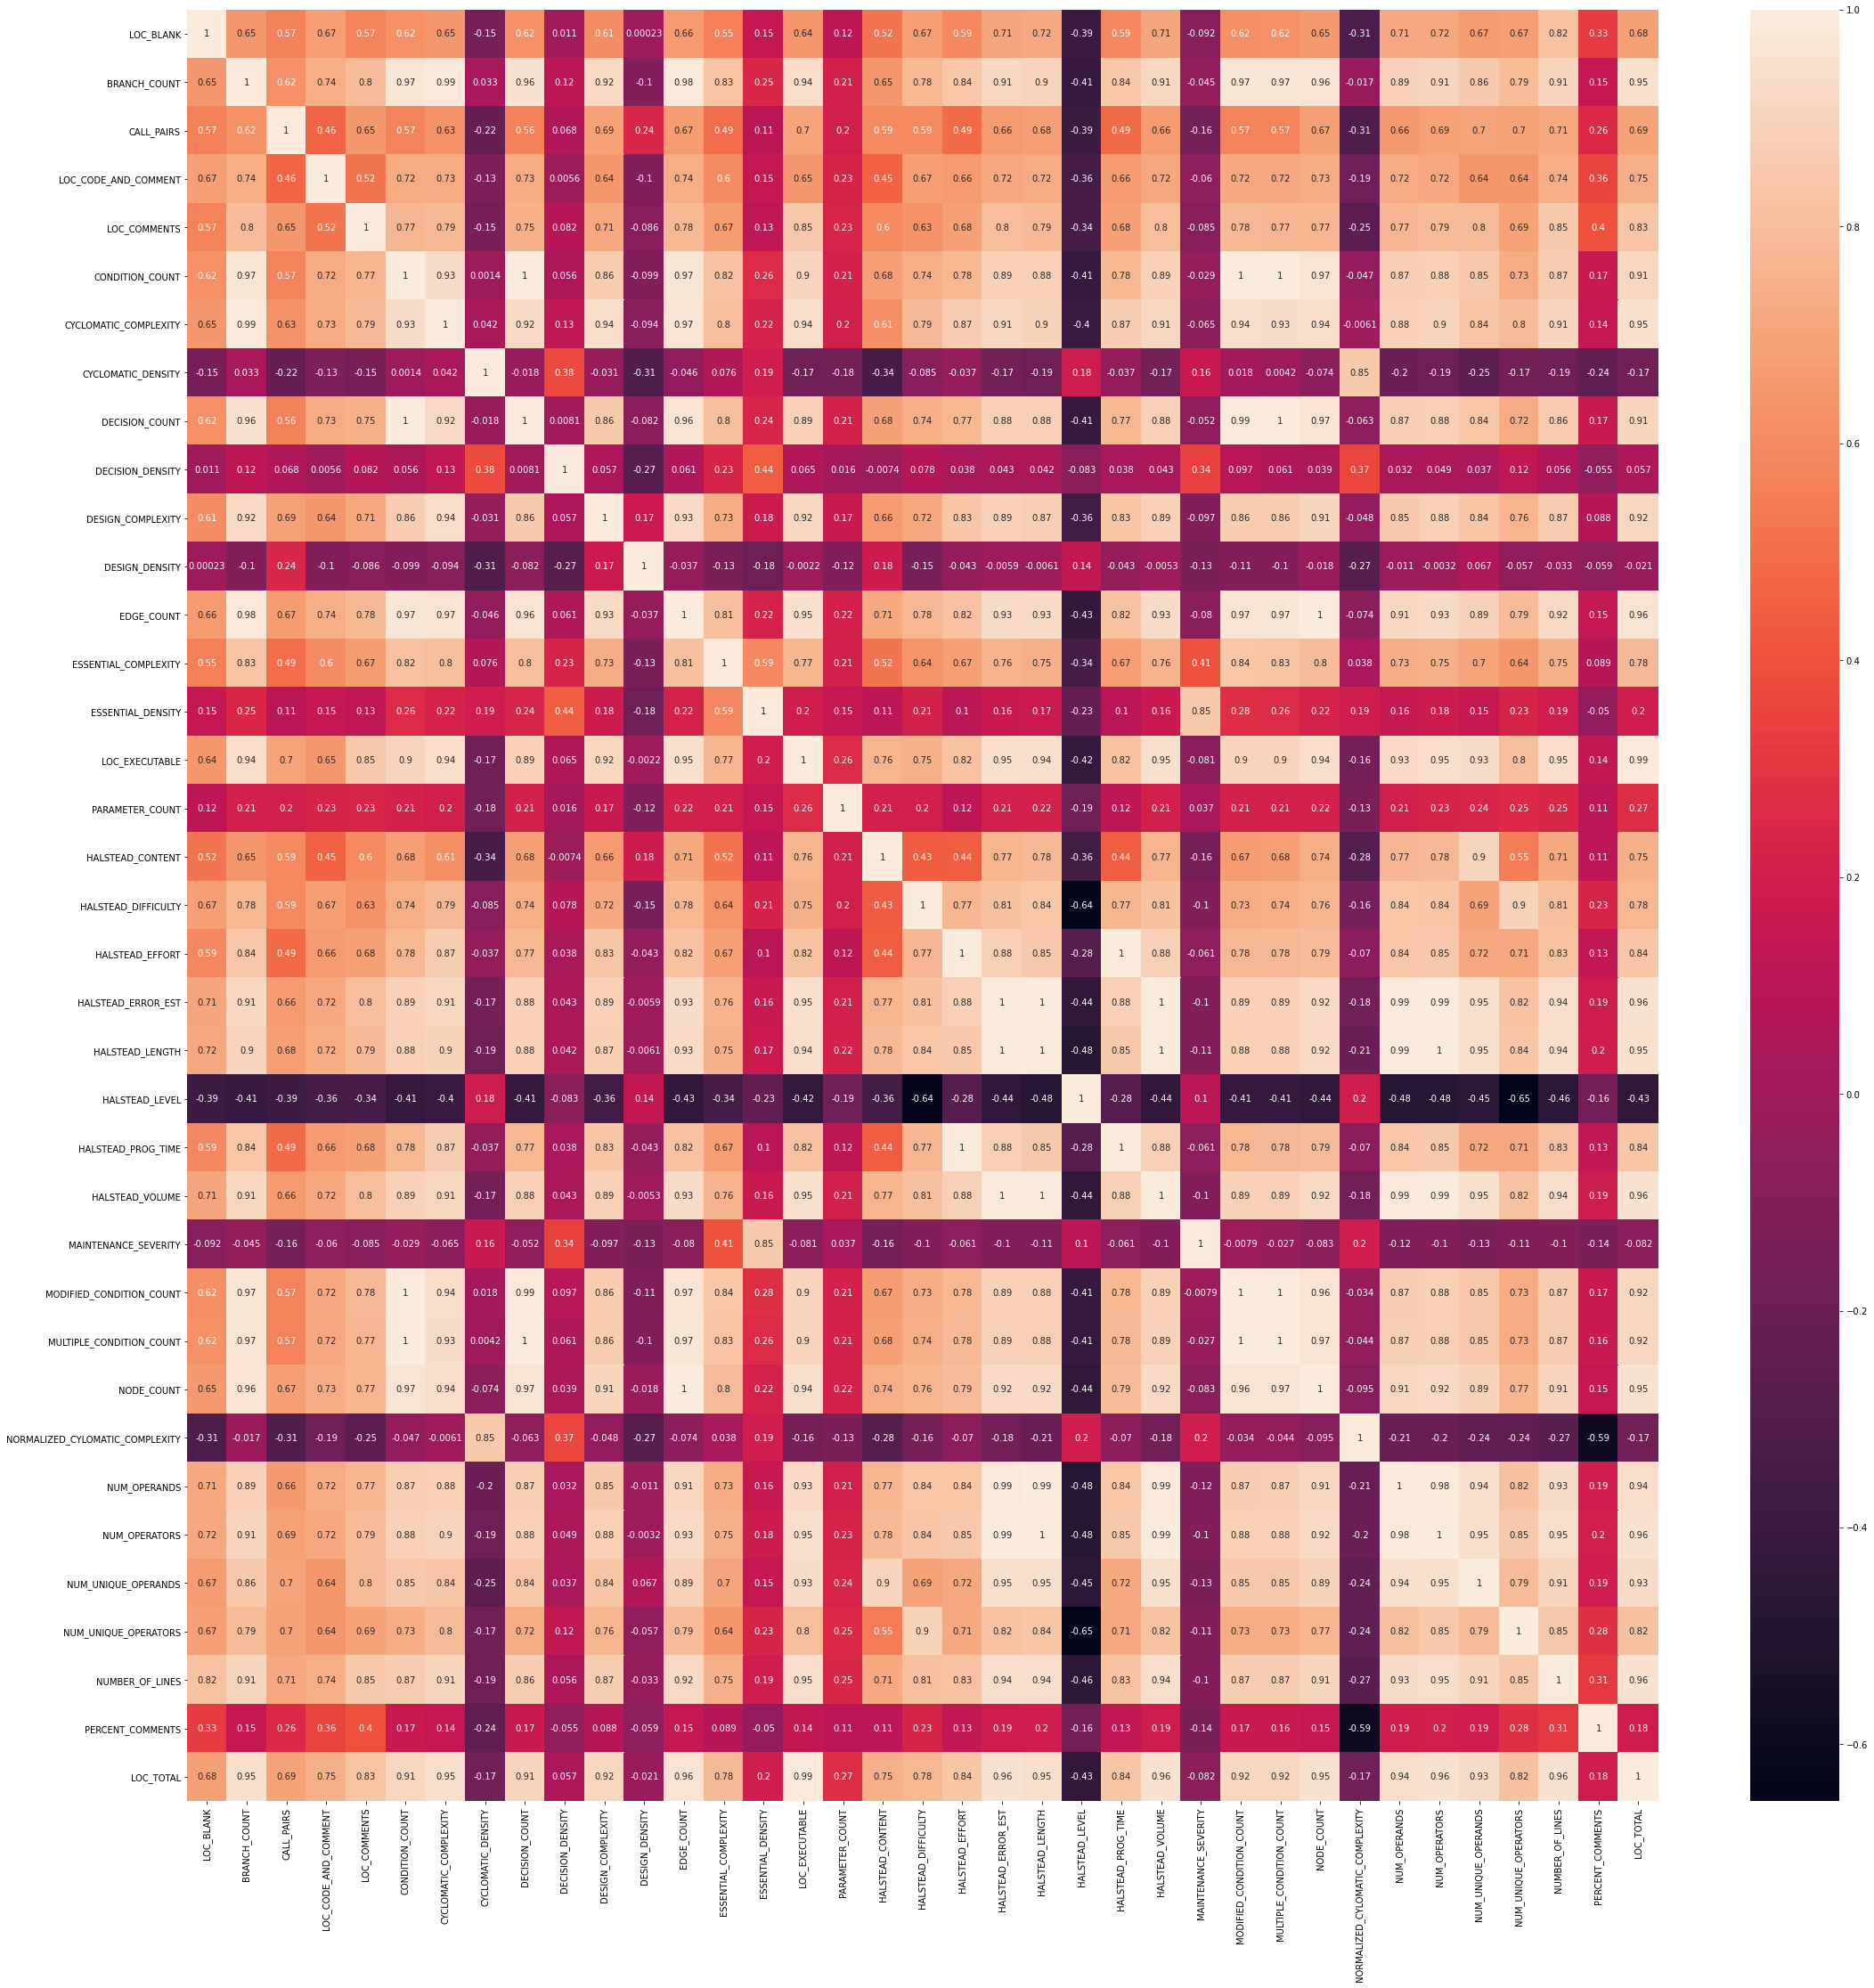

In [11]:
#CORRELATION MATRIX WITH HEATMAP
import seaborn as sns
corr = data.iloc[:,:-1].corr() #skipping my last coloumn
top_features = corr.index
plt.figure(figsize=(37,37))
sns.heatmap(data[top_features].corr(),annot=True)

In [12]:
threshold=0.9
#Finding and removing correlated features
def correlation(dataset,threshold):
    col_corr=set() #set all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute coefficent value
                colname = corr_matrix.columns[i] #getting the name of columns
                col_corr.add(colname)
    return col_corr
                

In [19]:
correlation(data.iloc[:,:-1],threshold)

{'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'DECISION_COUNT',
 'DESIGN_COMPLEXITY',
 'EDGE_COUNT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'LOC_EXECUTABLE',
 'LOC_TOTAL',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NUMBER_OF_LINES',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS'}

In [13]:
X_train.drop(correlation(data.iloc[:,:-1],threshold),axis=1)
X_test.drop(correlation(data.iloc[:,:-1],threshold),axis=1)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_DENSITY,DECISION_DENSITY,DESIGN_DENSITY,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_LEVEL,MAINTENANCE_SEVERITY,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_UNIQUE_OPERATORS,PERCENT_COMMENTS
141,5,3,9,0,6,0.07,2.00,1.00,1,0.00,0,58.05,14.68,12512.17,0.07,0.50,0.05,17,16.67
6,13,9,5,12,16,0.14,2.00,1.00,5,1.00,4,38.51,14.25,7820.87,0.07,1.00,0.07,15,52.83
60,10,7,5,5,1,0.18,2.00,0.75,1,0.00,2,31.11,12.06,4520.83,0.08,0.25,0.12,14,26.09
249,32,13,13,16,23,0.09,2.00,1.00,1,0.00,9,104.75,22.14,51324.87,0.05,0.14,0.05,26,39.80
54,15,13,4,1,1,0.19,2.00,0.86,1,0.00,2,34.37,26.52,24176.72,0.04,0.14,0.13,19,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,7,3,0,0,0,0.13,2.00,0.50,1,0.00,2,37.54,7.60,2168.23,0.13,0.50,0.09,12,0.00
1,15,7,3,1,19,0.13,2.00,0.50,1,0.00,1,38.55,21.52,17846.19,0.05,0.25,0.06,27,39.22
120,8,19,4,6,7,0.19,2.29,0.70,9,0.89,0,105.02,18.86,37359.42,0.05,0.90,0.14,21,21.67
8,16,9,2,11,28,0.11,3.00,0.20,5,1.00,2,41.24,20.76,17773.08,0.05,1.00,0.06,19,53.42


In [14]:
X_train

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
219,40,11,4,25,13,16,6,0.08,8,2.00,...,8,23,0.04,107,172,54,25,151,44.19,73
271,5,3,0,2,2,4,2,0.18,2,2.00,...,2,5,0.11,21,32,8,13,19,30.77,11
266,2,3,0,0,0,4,2,0.20,2,2.00,...,2,5,0.15,6,10,3,8,13,0.00,10
335,12,19,2,0,0,36,10,0.20,18,2.00,...,18,39,0.16,50,88,32,13,63,0.00,50
217,1,5,0,0,0,8,3,0.33,4,2.00,...,4,8,0.27,18,23,7,11,11,0.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,7,3,0,0,10,4,0.18,4,2.50,...,5,13,0.17,39,59,26,17,23,0.00,22
192,84,37,10,44,76,66,19,0.13,32,2.06,...,33,65,0.06,264,421,100,50,306,54.30,145
117,2,49,8,33,58,90,25,0.16,42,2.14,...,45,94,0.11,326,464,108,36,233,41.55,161
47,55,7,9,0,23,12,4,0.19,6,2.00,...,6,17,0.04,28,49,22,12,100,52.27,21
